In [ ]:
#Importing packages
!pip install textblob


In [ ]:
#Importing packages
conda install -c conda-forge wordcloud=1.6.0 

In [1]:
#Libraries
import numpy as np
import pandas as pd
import datetime as dt
import sys
import matplotlib.pyplot as plt
import os
import nltk
import re
import string
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
#from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [2]:
#Importing the data
df_com_tweet =pd.read_csv("/Users/davidalbuja/Documents/Career/Nodel/Prueba Seleccion/archive/Company_Tweet.csv")
df_company =pd.read_csv("/Users/davidalbuja/Documents/Career/Nodel/Prueba Seleccion/archive/Company.csv")
df_tweet =pd.read_csv("/Users/davidalbuja/Documents/Career/Nodel/Prueba Seleccion/archive/Tweet.csv")



In [3]:
#Overview of the tweet id data 
df_com_tweet.head()

,tweet_id,ticker_symbol
0,550803612197457920,AAPL
1,550803610825928706,AAPL
2,550803225113157632,AAPL
3,550802957370159104,AAPL
4,550802855129382912,AAPL


In [4]:
#Knowing the tweet id data
df_com_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4336445 entries, 0 to 4336444
Data columns (total 2 columns):
tweet_id         int64
ticker_symbol    object
dtypes: int64(1), object(1)
memory usage: 66.2+ MB


In [5]:
#Overviw of the companies data
df_company

,ticker_symbol,company_name
0,AAPL,apple
1,GOOG,Google Inc
2,GOOGL,Google Inc
3,AMZN,Amazon.com
4,TSLA,Tesla Inc
5,MSFT,Microsoft


In [6]:
#Knowing the companies data
df_company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 2 columns):
ticker_symbol    6 non-null object
company_name     6 non-null object
dtypes: object(2)
memory usage: 224.0+ bytes


In [7]:
#Overview of the tweet data
df_tweet.head()

,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num
0,550441509175443456,VisualStockRSRC,1420070457,"lx21 made $10,008 on $AAPL -Check it out! htt...",0,0,1
1,550441672312512512,KeralaGuy77,1420070496,Insanity of today weirdo massive selling. $aap...,0,0,0
2,550441732014223360,DozenStocks,1420070510,S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...,0,0,0
3,550442977802207232,ShowDreamCar,1420070807,$GM $TSLA: Volkswagen Pushes 2014 Record Recal...,0,0,1
4,550443807834402816,i_Know_First,1420071005,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1


In [8]:
#Knowing the tweet data
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3717964 entries, 0 to 3717963
Data columns (total 7 columns):
tweet_id       int64
writer         object
post_date      int64
body           object
comment_num    int64
retweet_num    int64
like_num       int64
dtypes: int64(5), object(2)
memory usage: 198.6+ MB


In [9]:
#building a complete dataframe (joinning all the information into one dataframe)
df_c = df_com_tweet.merge(df_company, left_on='ticker_symbol', right_on='ticker_symbol', how = 'left')
df_complete = df_tweet.merge(df_c, left_on='tweet_id', right_on='tweet_id', how = 'left')

In [10]:
df_complete.head()

,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num,ticker_symbol,company_name
0,550441509175443456,VisualStockRSRC,1420070457,"lx21 made $10,008 on $AAPL -Check it out! htt...",0,0,1,AAPL,apple
1,550441672312512512,KeralaGuy77,1420070496,Insanity of today weirdo massive selling. $aap...,0,0,0,AAPL,apple
2,550441732014223360,DozenStocks,1420070510,S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...,0,0,0,AMZN,Amazon.com
3,550442977802207232,ShowDreamCar,1420070807,$GM $TSLA: Volkswagen Pushes 2014 Record Recal...,0,0,1,TSLA,Tesla Inc
4,550443807834402816,i_Know_First,1420071005,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1,AAPL,apple


In [11]:
df_complete.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4336445 entries, 0 to 4336444
Data columns (total 9 columns):
tweet_id         int64
writer           object
post_date        int64
body             object
comment_num      int64
retweet_num      int64
like_num         int64
ticker_symbol    object
company_name     object
dtypes: int64(5), object(4)
memory usage: 330.8+ MB


In [12]:
#Knowign how percentage of NA values each colum has
na_ratio = ((df_complete.isna().sum() / len(df_complete))*100).sort_values(ascending = False)
na_ratio

writer           1.289512
company_name     0.000000
ticker_symbol    0.000000
like_num         0.000000
retweet_num      0.000000
comment_num      0.000000
body             0.000000
post_date        0.000000
tweet_id         0.000000
dtype: float64

In [13]:
#Converting column "post_date" into date
df_complete['post_date'] = df_complete['post_date'].apply(lambda x: dt.date.fromtimestamp(x).strftime('%B-%d-%Y %I:%M %p'))


In [14]:
#Converting post_date to time
df_complete['date'] = pd.to_datetime(df_complete['post_date'].str.strip())

In [15]:
df_complete.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4336445 entries, 0 to 4336444
Data columns (total 10 columns):
tweet_id         int64
writer           object
post_date        object
body             object
comment_num      int64
retweet_num      int64
like_num         int64
ticker_symbol    object
company_name     object
date             datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(5)
memory usage: 363.9+ MB


In [16]:
df_complete.head()

,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num,ticker_symbol,company_name,date
0,550441509175443456,VisualStockRSRC,December-31-2014 12:00 AM,"lx21 made $10,008 on $AAPL -Check it out! htt...",0,0,1,AAPL,apple,2014-12-31
1,550441672312512512,KeralaGuy77,December-31-2014 12:00 AM,Insanity of today weirdo massive selling. $aap...,0,0,0,AAPL,apple,2014-12-31
2,550441732014223360,DozenStocks,December-31-2014 12:00 AM,S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...,0,0,0,AMZN,Amazon.com,2014-12-31
3,550442977802207232,ShowDreamCar,December-31-2014 12:00 AM,$GM $TSLA: Volkswagen Pushes 2014 Record Recal...,0,0,1,TSLA,Tesla Inc,2014-12-31
4,550443807834402816,i_Know_First,December-31-2014 12:00 AM,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1,AAPL,apple,2014-12-31


## Sentiment analysis

In [17]:
#Droping duplicates from original dataframe
df_sent = df_complete
df_sent.drop_duplicates(inplace = True)

In [18]:
df_sent.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4336445 entries, 0 to 4336444
Data columns (total 10 columns):
tweet_id         int64
writer           object
post_date        object
body             object
comment_num      int64
retweet_num      int64
like_num         int64
ticker_symbol    object
company_name     object
date             datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(5)
memory usage: 363.9+ MB


In [19]:
#Cleaning tweets

df_sent['clean_tweet'] = df_sent['body']

#Removing-changing RT, Punctuation, lower case
remove_rt = lambda x: re.sub('RT @\w+: '," ",x)
rt = lambda x: re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)
df_sent['clean_tweet'] = df_sent.clean_tweet.map(remove_rt).map(rt)
df_sent['clean_tweet'] = df_sent.clean_tweet.str.lower()

In [20]:
#Removing URLs
remove_rt2 = lambda x: re.sub(r"http\S+|www\S+|https\S+"," ",x)
rt = lambda x: re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)
df_sent['clean_tweet'] = df_sent.clean_tweet.map(remove_rt2).map(rt)


In [21]:
#Removing stop words
stop = stopwords.words('english')

df_sent['clean_tweet'] = df_sent['clean_tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))


In [22]:
#Getting subjectivity from the clean tweets
def const_subjectivity(Text):
    return TextBlob(Text).sentiment.subjectivity

df_sent['subjectivity'] = df_sent['clean_tweet'].apply(const_subjectivity)

In [23]:
#Getting polarity from the clean tweets
def const_polarity(Text):
    return TextBlob(Text).sentiment.polarity

df_sent['polarity'] = df_sent['clean_tweet'].apply(const_polarity)

In [24]:
#Getting sentiment based on the polarity of the tweet
def sentiment(score):
    if score <0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

df_sent['analysis'] = df_sent['polarity'].apply(sentiment)

In [33]:
#Download data frame for plotting in powerBI (this tool is used for analyzing a more interactive plot)
#This step is performing for answering the task: Sentiment analysis of the companies with 
#a time series in a graph and reasoning the possible declines and rises.
#The findings of this task is also presented in the report attached.
df_sent.to_csv("/Users/davidalbuja/Documents/Career/Nodel/Prueba Seleccion/archive/clean_tweet_data.csv")

### Findings of the sentiment analysis with a time siries graph

Apple

Negative comments maintain the same slope throughout all 5 years except for a peak that occurs in September 2016. This peak occurs in the same way for positive and neutral comments, this is caused by the 10 years of the launch of its star product, the iPhone. This month the iPhone X was released so both positive and negative comments are increasing. On the other hand, the positive comments have 3 important increases, the one already explained in September 2016, in March 2015, and in January 2019. In March 2015 it is due to a growth in the portfolio and news around Apple's entry into the world of entertainment with their Apple TV. The growth in January 2019 is due to the sales record that Apple achieved and also to discounts that the company promoted. It is interesting to see how the neutral comments decrease from February 2017 while the positive comments have a slight increase.

Google

For Google, its negative comments have been constant over the 5 years without increasing or decreasing them. However, the positive comments have a slight increase in their slope with different peaks over time. The peak with the greatest pronouncement occurs in October 2016 due to launches of new technology in alliance with the company Alphabet Inc. In addition, the increase is also due to the launch of its new pixel cell phone, cataloged at that time as the Smartphone with the best camera, the one that had better reviews than the iPhone. On the other hand, there is a peak in neutral comments that occurs in July 2015, but it is due to a high number of responses from the same user (perhaps from the same company) that responds to user uncertainties.

Amazon

In general, Amazon has an increase in negative and positive comments as neutral tweets decrease. The significant increase in positive opinions is evidenced in June 2017 due to the company announcing its participation in the supermarket sector (whole foods market). However, 2 years later there is a decrease in these comments and an increase in negative opinions due to political issues with Trump that are linked to the company, as well as doubts about the veracity of Amazon tax payments.

Tesla

Tesla has a different behavior from the other companies. From January 2015 to February 2018 the behavior of its positive, negative, and neutral tweets is constant. However, after April 2018 the three types of tweets have a significant increase reaching their peak in August 2018. This change in the slope is due to comments of its CEO, Elon Musk, saying that the company would not belong anymore in the stock market. Nevertheless, after several weeks these comments were denied allowing Tesla to continue trading on the stock market. This is the main reason why the increase of negative and positive comments occurs in the same period.

Microsoft

For Microsoft, the negative comments are constant over the 5 years, but the positive comments have a high peak of one year (from June 2016 to June 2017). This is due to the company's cloud service, the launch of Xbox One, improvements in its Minecraft education platform, and the company's purchase of LinkedIn. In the same way, neutral comments have a peek at the same time due to the same topics, but with the difference of being informative rather than opinion comments.


## Wordcloud

For answering the task: Which are the main topics that influence each company's rise and decline in the stock market. After cleaning and computing the sentiment analysis of the tweets, a word cloud has been computed for each type of analysis (positive, neutral and negative) in all the companies.

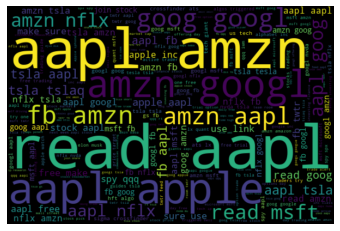

In [32]:
#Computing a wordcloud for the entire data to hace an overview of the information
words = ' '.join([i for i in df_sent['clean_tweet']])
wordCloud = WordCloud(width = 600, height = 400, random_state = 21, max_font_size = 115).generate(words)

plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

The principal topics are the names of the companies that are analized, so for a better comprehension of the data, this name are removed.

In [80]:
#Removign company names

comp_names = ['aapl', 'amzn', 'googl', 'tsla', 'msft', 'goog', 'tslq', 'apple', 'google',
             'amazon', 'tesla', 'microsoft', 'tslaq', 'today']

df_sent['no_comp_tweet'] = df_sent['clean_tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (comp_names)]))

## Main topics for Apple

##### Positive

In [81]:
#Filtering the positive tweets for apple
apple_pos = df_sent[(df_sent.company_name == "apple") & (df_sent.analysis == "Positive")]

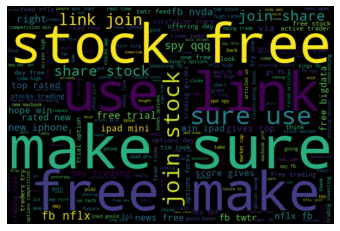

In [82]:
#Computing the wordcloud for the postivies tweets for apple
wordsAp = ' '.join([i for i in apple_pos['no_comp_tweet']])
wordCloudAp = WordCloud(width = 600, height = 400, random_state = 21, max_font_size = 115).generate(wordsAp)

plt.imshow(wordCloudAp, interpolation = "bilinear")
plt.axis('off')
plt.show()

The positive comments that influence the stock market are related to the launch of the new products that Apple brings out, for this reason, topics such as the new iPhone, iPad mini, Apple Watch are presented as main in the tweets. The main topics also refer to "stock free" and "join stock" where apple is completely linked to the stock market.

##### Neutral

In [83]:
#Filtering the neutral tweets for apple
apple_neu = df_sent[(df_sent.company_name == "apple") & (df_sent.analysis == "Neutral")]

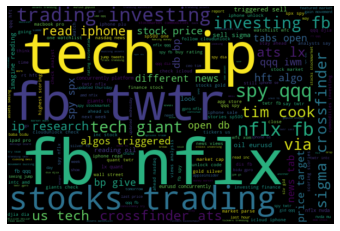

In [84]:
#Computing the wordcloud for the neutral tweets for apple
wordsAneu = ' '.join([i for i in apple_neu['no_comp_tweet']])
wordCloudAneu = WordCloud(width = 600, height = 400, random_state = 21, max_font_size = 115).generate(wordsAneu)

plt.imshow(wordCloudAneu, interpolation = "bilinear")
plt.axis('off')
plt.show()

Neutral comments have as main topics different applications names such as Facebook, Netflix, and Twitter where the tweets could be characterized as being informative. The name of the CEO of Apple is also featured as one of the main topics.

##### Negative

In [85]:
#Filtering the negative tweets for apple
apple_neg = df_sent[(df_sent.company_name == "apple") & (df_sent.analysis == "Negative")]

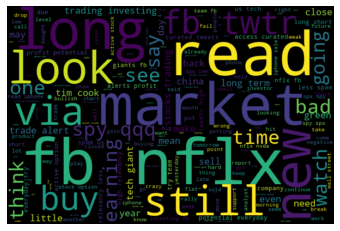

In [86]:
#Computing the wordcloud for the negative tweets for apple
wordsAneg = ' '.join([i for i in apple_neg['no_comp_tweet']])
wordCloudAneg = WordCloud(width = 600, height = 400, random_state = 21, max_font_size = 115).generate(wordsAneg)

plt.imshow(wordCloudAneg, interpolation = "bilinear")
plt.axis('off')
plt.show()

Among the negative comments, the main topics refer to "trading investment", "trade alert" and "market". These topics can be considered more "technical" within the stock market. Also on these tweets, the name of Tim Cook (CEO of Apple) can be seen. Words like "spy", "close", "need break" demonstrate the insecurity of a company in front of different investors.

## Main topics for Google

##### Positive

In [87]:
#Filtering the positive tweets for google
goog_pos = df_sent[(df_sent.company_name == "Google Inc") & (df_sent.analysis == "Positive")]

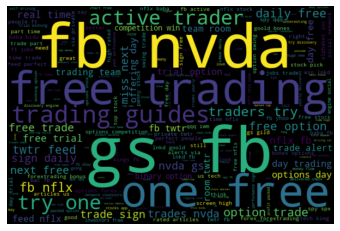

In [88]:
#Computing the wordcloud for the postive tweets for google
wordsGp = ' '.join([i for i in goog_pos['no_comp_tweet']])
wordCloudGp = WordCloud(width = 600, height = 400, random_state = 21, max_font_size = 115).generate(wordsGp)

plt.imshow(wordCloudGp, interpolation = "bilinear")
plt.axis('off')
plt.show()

In the positive comments of Google the word "free" is quite prevalent, it appears in main topics like: "free trading", "free trial", "next free". Additionally, these go by the hand with "traders" allowing a combination that captive attention for the stock market.

##### Neutral

In [89]:
#Filtering the neutral tweets for google
goog_neu = df_sent[(df_sent.company_name == "Google Inc") & (df_sent.analysis == "Neutral")]

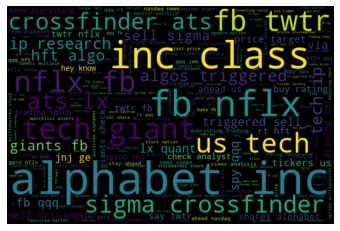

In [90]:
#Computing the wordcloud for the neutral tweets for google
wordsGneu = ' '.join([i for i in goog_neu['no_comp_tweet']])
wordCloudGneu = WordCloud(width = 600, height = 400, random_state = 21, max_font_size = 115).generate(wordsGneu)

plt.imshow(wordCloudGneu, interpolation = "bilinear")
plt.axis('off')
plt.show()

Within the neutral comments there are names of apps such as Facebook and Netflix but there are also company descriptions such as "giant tech".

##### Negative

In [91]:
#Filtering the negative tweets for google
goog_neg = df_sent[(df_sent.company_name == "Google Inc") & (df_sent.analysis == "Negative")]

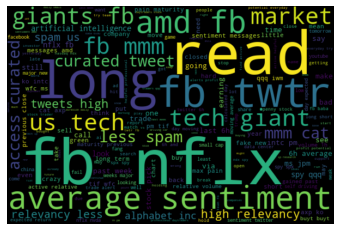

In [92]:
#Computing the wordcloud for the negative tweets for google
wordsGneg = ' '.join([i for i in goog_neg['no_comp_tweet']])
wordCloudGneg = WordCloud(width = 600, height = 400, random_state = 21, max_font_size = 115).generate(wordsGneg)

plt.imshow(wordCloudGneg, interpolation = "bilinear")
plt.axis('off')
plt.show()

Among the negative comments technological terms such as "artificial intelligence" and "spam" appeared, as well as descriptions for the company such as "tech giant". In addition, the name of "alphabet inc", a company that provides the necessary resources for ambitious projects, also appears as the main topic.

## Main Topic for Amazon

##### Positive

In [93]:
#Filtering the postive tweets for amazon
amz_pos = df_sent[(df_sent.company_name == "Amazon.com") & (df_sent.analysis == "Positive")]

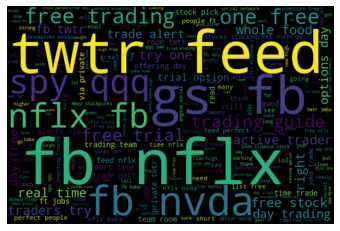

In [94]:
#Computing the wordcloud for the positive tweets for amazon
wordsAMp = ' '.join([i for i in amz_pos['no_comp_tweet']])
wordCloudAMp = WordCloud(width = 600, height = 400, random_state = 21, max_font_size = 115).generate(wordsAMp)

plt.imshow(wordCloudAMp, interpolation = "bilinear")
plt.axis('off')
plt.show()

The main topics in the positive tweets from Amazon refer mainly to "trading". In addition, there are many comments related to the quality of the company's services such as: "real time", "free trial" and "one free".

##### Neutral

In [95]:
#Filtering the neutral tweets for amazon
amz_neu = df_sent[(df_sent.company_name == "Amazon.com") & (df_sent.analysis == "Neutral")]

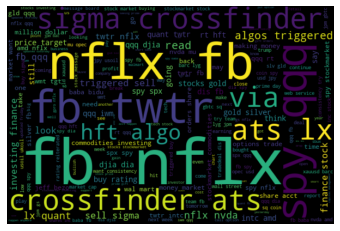

In [96]:
#Computing the wordcloud for the neutral tweets for amazon
wordsAMneu = ' '.join([i for i in amz_neu['no_comp_tweet']])
wordCloudAMneu = WordCloud(width = 600, height = 400, random_state = 21, max_font_size = 115).generate(wordsAMneu)

plt.imshow(wordCloudAMneu, interpolation = "bilinear")
plt.axis('off')
plt.show()

Neutral comments have as main topics different applications names such as Facebook, Netflix, and Twitter. These tweets could be characterized as being informative.

##### Negative

In [97]:
#Filtering the negative tweets for amazon
amz_neg = df_sent[(df_sent.company_name == "Amazon.com") & (df_sent.analysis == "Negative")]

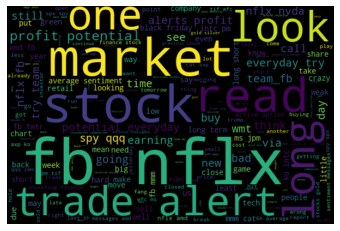

In [98]:
#Computing the wordcloud for the negative tweets for amazon
wordsAMneg = ' '.join([i for i in amz_neg['no_comp_tweet']])
wordCloudAMneg = WordCloud(width = 600, height = 400, random_state = 21, max_font_size = 115).generate(wordsAMneg)

plt.imshow(wordCloudAMneg, interpolation = "bilinear")
plt.axis('off')
plt.show()

The relevant topics in the negative comments are addressed to the market itself, such as "trade alert", "stock", "profit alerts", and "profit potential". In addition, the word "long" is a characteristic of these tweets, where it could be inferred as the long waiting times on its services.

## Main topics for Tesla

##### Positive

In [99]:
#Filtering the positive tweets for tesla
tsla_pos = df_sent[(df_sent.company_name == "Tesla Inc") & (df_sent.analysis == "Positive")]

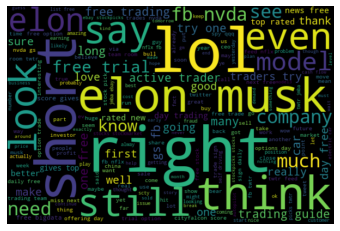

In [100]:
#Computing the wordcloud for the positive tweets for tesla
wordsTp = ' '.join([i for i in tsla_pos['no_comp_tweet']])
wordCloudTp = WordCloud(width = 600, height = 400, random_state = 21, max_font_size = 115).generate(wordsTp)

plt.imshow(wordCloudTp, interpolation = "bilinear")
plt.axis('off')
plt.show()

In the positive tweets for Tesla, the main topic talks about the CEO of the company Elon Musk. However, topics that also are striking have principal words such as "think", "right" and "first", words that are common characteristics when speaking about Tesla.

##### Neutral

In [101]:
#Filtering the neutral tweets for tesla
tsla_neu = df_sent[(df_sent.company_name == "Tesla Inc") & (df_sent.analysis == "Neutral")]

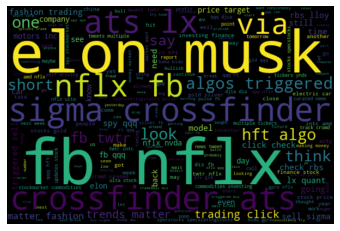

In [102]:
#Computing the wordcloud for the neutral tweets for tesla
wordsTneu = ' '.join([i for i in tsla_neu['no_comp_tweet']])
wordCloudTneu = WordCloud(width = 600, height = 400, random_state = 21, max_font_size = 115).generate(wordsTneu)

plt.imshow(wordCloudTneu, interpolation = "bilinear")
plt.axis('off')
plt.show()

In the neutral comments the main topic in the tweets is Elon Musk.

##### Negative

In [103]:
#Filtering the negative tweets for tesla
tsla_neg = df_sent[(df_sent.company_name == "Tesla Inc") & (df_sent.analysis == "Negative")]

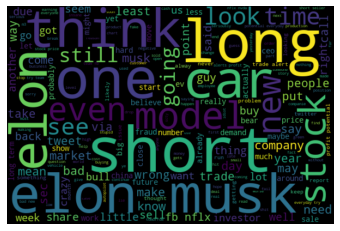

In [104]:
#Computing the wordcloud for the negative tweets for tesla
wordsTneg = ' '.join([i for i in tsla_neg['no_comp_tweet']])
wordCloudTneg = WordCloud(width = 600, height = 400, random_state = 21, max_font_size = 115).generate(wordsTneg)

plt.imshow(wordCloudTneg, interpolation = "bilinear")
plt.axis('off')
plt.show()

It is interesting to see how in the stock market Tesla depends on what Elon Musk says, this is why his name also appears as the main topic in negative tweets. However, topics referring to the company's main product such as "car" and "new model" also appear. The launch of new technology in the company has a lot to do with seeing the behavior in the stock market for Tesla.

## Main Topics for Microsoft

##### Positive

In [105]:
#Filtering the positive tweets for microsoft
msft_pos = df_sent[(df_sent.company_name == "Microsoft") & (df_sent.analysis == "Positive")]

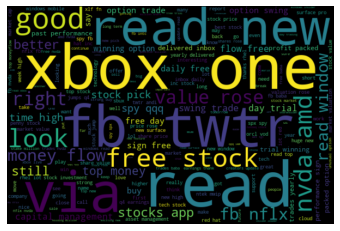

In [106]:
#Computing the wordcloud for the positive tweets for microsoft
wordsMSFp = ' '.join([i for i in msft_pos['no_comp_tweet']])
wordCloudMSFp = WordCloud(width = 600, height = 400, random_state = 21, max_font_size = 115).generate(wordsMSFp)

plt.imshow(wordCloudMSFp, interpolation = "bilinear")
plt.axis('off')
plt.show()

The positive comments refer to one of the star products of Microsoft, which is the Xbox One.

##### Neutral

In [107]:
#Filtering the neutral tweets for microsoft
msft_neu = df_sent[(df_sent.company_name == "Microsoft") & (df_sent.analysis == "Neutral")]

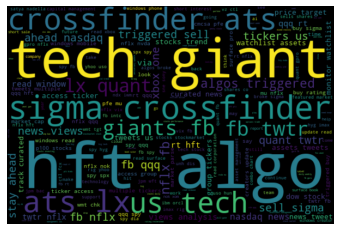

In [108]:
#Computing the wordcloud for the neutral tweets for microsoft
wordsMSFneu = ' '.join([i for i in msft_neu['no_comp_tweet']])
wordCloudMSFneu = WordCloud(width = 600, height = 400, random_state = 21, max_font_size = 115).generate(wordsMSFneu)

plt.imshow(wordCloudMSFneu, interpolation = "bilinear")
plt.axis('off')
plt.show()

Neutral comments are mainly followed by the description of what Microsoft is: a "tech giant"

##### Negative

In [109]:
#Filtering the negative tweets for microsoft
msft_neg = df_sent[(df_sent.company_name == "Microsoft") & (df_sent.analysis == "Negative")]

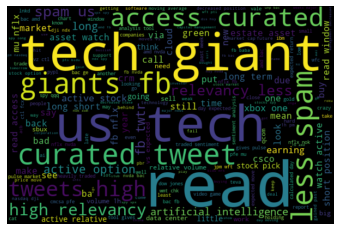

In [110]:
#Computing the wordcloud for the negative tweets for microsoft
wordsMSFneg = ' '.join([i for i in msft_neg['no_comp_tweet']])
wordCloudMSFneg = WordCloud(width = 600, height = 400, random_state = 21, max_font_size = 115).generate(wordsMSFneg)

plt.imshow(wordCloudMSFneg, interpolation = "bilinear")
plt.axis('off')
plt.show()

Negative tweets at Microsoft refer to technology topics such as "spam", "artificial intelligence" and "windows".

In [44]:
apple_pos.head()

,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num,ticker_symbol,company_name,date,clean_tweet,subjectivity,polarity,analysis,no_comp_tweet
18,550444112328261632,GetAOM,December-31-2014 12:00 AM,$UNP $ORCL $QCOM $MSFT $AAPL Top scoring mega ...,0,0,0,AAPL,apple,2014-12-31,unp orcl qcom msft aapl top scoring mega caps ...,0.517857,0.392857,Positive,unp orcl qcom top scoring mega caps right end ...
20,550444969924653056,AppleNewsAAPL,December-31-2014 12:00 AM,$AAPL Apple goes global with 'Start Something ...,0,0,1,AAPL,apple,2014-12-31,aapl apple goes global start something new ad ...,0.227273,0.068182,Positive,apple goes global start something new ad campaign
23,550445850170642432,JorelLaraKalel,December-31-2014 12:00 AM,@CNBC 15 Top #trades for #2015 #FastMoney $TIF...,0,0,2,AAPL,apple,2014-12-31,15 top trades 2015 fastmoney tif aapl tgt twtr...,0.500000,0.500000,Positive,15 top trades 2015 fastmoney tif tgt twtr bidu...
24,550447574285418497,btcgemini,December-31-2014 12:00 AM,We searched through hundreds of charts and fou...,0,0,0,AAPL,apple,2014-12-31,searched hundreds charts found 20 perfectly ca...,1.000000,1.000000,Positive,searched hundreds charts found 20 perfectly ca...
25,550447850857828352,JorelLaraKalel,December-31-2014 12:00 AM,Top 10 searched #stocks of #2014 $AAPL $FB $BA...,0,0,2,AAPL,apple,2014-12-31,top 10 searched stocks 2014 aapl fb baba tsla ...,0.500000,0.500000,Positive,top 10 searched stocks 2014 fb baba bac intc g...


In [29]:
#Function to Create Wordcloud

def create_wordcloud(text):
    mask = np.array(Image.open("cloud.png"))
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white",
                  mask = mask,
                  max_words=3000,
                  stopwords=stopwords,
                  repeat=True)
    wc.generate(str(text))
    #wc.to_file("wc.png")
    #print("Word Cloud Saved Successfully")
    #path="wc.png"
    #display(Image.open(path))
    return wc

In [30]:
#Creating wordcloud for all tweets
create_wordcloud(df_sent['clean_tweet'].values)

NameError: name 'mask' is not defined

In [35]:
df_sent.head()

,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num,ticker_symbol,company_name,date,clean_tweet,subjectivity,polarity,analysis,no_comp_tweet
0,550441509175443456,VisualStockRSRC,December-31-2014 12:00 AM,"lx21 made $10,008 on $AAPL -Check it out! htt...",0,0,1,AAPL,apple,2014-12-31,lx21 made 10 008 aapl check learn howtotrade e...,0.0,0.00,Neutral,lx21 made 10 008 check learn howtotrade exe wa...
1,550441672312512512,KeralaGuy77,December-31-2014 12:00 AM,Insanity of today weirdo massive selling. $aap...,0,0,0,AAPL,apple,2014-12-31,insanity today weirdo massive selling aapl bid...,1.0,0.00,Neutral,insanity today weirdo massive selling bid 45 c...
2,550441732014223360,DozenStocks,December-31-2014 12:00 AM,S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...,0,0,0,AMZN,Amazon.com,2014-12-31,p100 stocks performance hd low sbux tgt dvn ib...,0.3,0.00,Neutral,p100 stocks performance hd low sbux tgt dvn ib...
3,550442977802207232,ShowDreamCar,December-31-2014 12:00 AM,$GM $TSLA: Volkswagen Pushes 2014 Record Recal...,0,0,1,TSLA,Tesla Inc,2014-12-31,gm tsla volkswagen pushes 2014 record recall t...,0.5,0.25,Positive,gm volkswagen pushes 2014 record recall tally ...
4,550443807834402816,i_Know_First,December-31-2014 12:00 AM,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1,AAPL,apple,2014-12-31,swing trading 8 91 return 14 days swingtrading...,0.0,0.00,Neutral,swing trading 8 91 return 14 days swingtrading...


In [ ]:
#Calculating Negative, Positive, Neutral and Compound values

#df_sent[['polarity', 'subjectivity']] = df_sent['clean_tweet'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
#for index, row in df_sent['clean_tweet'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    #compound = score['compound']
    if neg > pos:
        df_sent.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        df_sent.loc[index, 'sentiment'] = "positive"
    else:
        df_sent.loc[index, 'sentiment'] = "neutral"
    df_sent.loc[index, 'neg'] = neg
    df_sent.loc[index, 'neu'] = neu
    df_sent.loc[index, 'pos'] = pos
    #df_sent.loc[index, 'compound'] = compound


In [ ]:
df_sent.head()

In [ ]:
df_sent['clean_tweet_no_stopwords'].head()

In [ ]:
def preprocess_tweet_text(tweet):
2    tweet.lower()
3    # Remove urls
4    tweet = re.sub(r"http\S+|www\S+|https\S+", '', tweet, flags=re.MULTILINE)
5    # Remove user @ references and '#' from tweet
6    tweet = re.sub(r'\@\w+|\#','', tweet)
7    # Remove punctuations
8    tweet = tweet.translate(str.maketrans('', '', string.punctuation))
9    # Remove stopwords
10    tweet_tokens = word_tokenize(tweet)
11    filtered_words = [w for w in tweet_tokens if not w in stop_words]
12    
13    #ps = PorterStemmer()
14    #stemmed_words = [ps.stem(w) for w in filtered_words]
15    #lemmatizer = WordNetLemmatizer()
16    #lemma_words = [lemmatizer.lemmatize(w, pos='a') for w in stemmed_words]
17    
18    return " ".join(filtered_words)

In [ ]:
df_sent['clean_tweet'] = re.sub(r"http\S+|www\S+|https\S+", '', df_sent[''], flags=re.MULTILINE)

In [ ]:
tweet = re.sub(r'\@\w+|\#','', tweet)